In [0]:
from google.colab import files
files.upload()

Saving cleveland.csv to cleveland.csv
Saving hungary.csv to hungary.csv
Saving switzerland.csv to switzerland.csv


{'cleveland.csv': b'63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0\r\n67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2\r\n67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1\r\n37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0\r\n41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0\r\n56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0\r\n62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3\r\n57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0\r\n63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2\r\n53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1\r\n57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,0\r\n56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,0\r\n56.0,1.0,3.0,130.0,256.0,1.0,2.0,142.0,1.0,0.6,2.0,1.0,6.0,2\r\n44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,0\r\n52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,0\r\n57.0,1.0,3.0,150.0,1

do all the imports

In [0]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, Imputer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

now define the features in the csv file
then read csv using pandas and name those using "names = features" 

then concat those three data csv files using a temporary variable datatemp

In [0]:
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'heartdisease']
clivelandData = pd.read_csv('cleveland.csv', names = features)
hungarianData = pd.read_csv('hungary.csv', names = features)
switzerlandData = pd.read_csv('switzerland.csv', names = features)

datatemp = [clivelandData, hungarianData, switzerlandData]
data = pd.concat(datatemp)

now drop some fields ca,slope,thal because most of those datas are empty 

then replace all the ? to Not A Number(nan) using numpy

In [0]:
data = data.drop(["ca", "slope", "thal"],axis=1)
data = data.replace('?', np.nan)

draw a matrix figure of size 10,3 using missingno package

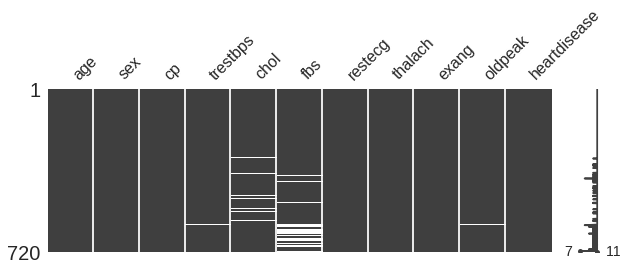

In [0]:
msno.matrix(data,figsize=(10,3))

we can see there are indded some missing datas present which happened because of the nan 

### now draw the boxplot using seaborn package

define the no of rows and coloumns then set size

more info: https://seaborn.pydata.org/generated/seaborn.boxplot.html

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


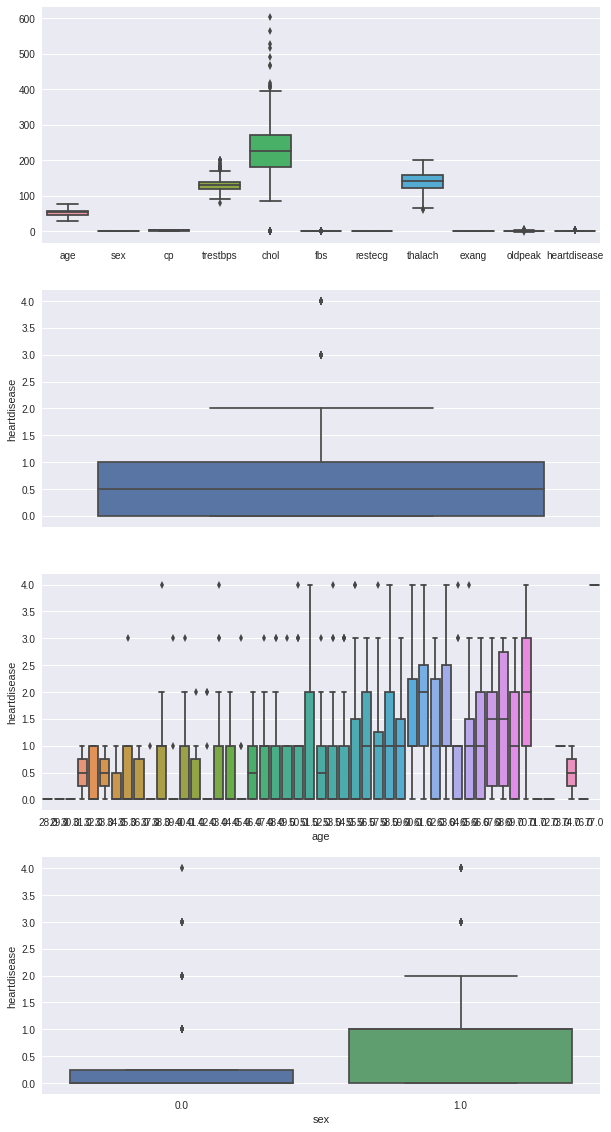

In [0]:
fig, axes = plt.subplots(nrows=4,ncols=1)
fig.set_size_inches(10, 20)
sn.boxplot(data=data,orient="v",ax=axes[0])
sn.boxplot(data=data,y="heartdisease",orient="v",ax=axes[1])
sn.boxplot(data=data,y="heartdisease",x="age",orient="v",ax=axes[2])
sn.boxplot(data=data,y="heartdisease",x="sex",orient="v",ax=axes[3])

Outliners detection and class imbalance ^

### Now the heatmap using seaborn

for more info: https://seaborn.pydata.org/generated/seaborn.heatmap.html



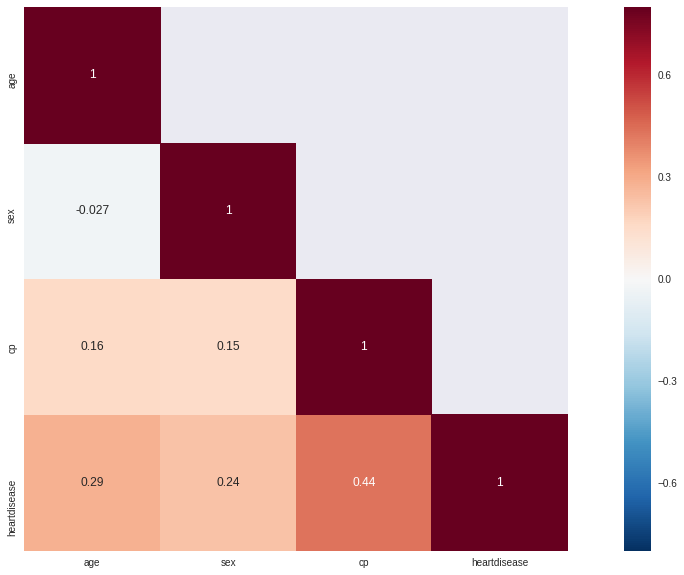

In [0]:
corrMatt = data.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

# Solution

we are using Imputer method from scikit-learn to impute data to the missing datas (we are filling those with average or mean values)

In [0]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imputedData = imp.fit_transform(data)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(imputedData[:, :-1], imputedData[:, -1], test_size=0.3, random_state=42)

In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training in linear

In [0]:
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, y_train)
preds = classifier.predict(X_test)

# prediction for linear

In [0]:
accuracy_score(y_test, preds)

0.6203703703703703

# Training for rbf

In [0]:
classifier = svm.SVC(kernel='rbf')
classifier.fit(X_train, y_train)
preds = classifier.predict(X_test)

# accuracy for rbf

In [0]:
accuracy_score(y_test, preds)

0.6527777777777778

# poly

In [0]:
classifier = svm.SVC(kernel='poly')
classifier.fit(X_train, y_train)
preds = classifier.predict(X_test)

In [0]:
accuracy_score(y_test, preds)

0.6296296296296297